# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Set latitude, longitude and temp. values

lat = []
lng = []
temp = []
hum = []
cld = []
wnd = []

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        lng.append(response['coord']['lat'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        cld.append(response['clouds']['all'])
        wnd.append(response['wind']['speed'])
        
    except:
        pass 
        
print(lng)
print(lat)
print(temp)

[-34.62, 62.46, -16.52, -16.84, -21.2, -46.6, -33.65, -20.46, -23.12, -28.65, 19.22, 57.79, 4.58, 62.32, 42.6, -0.6, 19.73, -34.42, -33.59, 21.35, 63.05, 31.18, -18.97, -46.19, 28.32, 12.18, -24.79, 32.67, 71.97, -53.15, 48.65, 68.22, -54.8, 70.63, -30.28, 41.49, -8.9, 45.32, 71.69, -46.28, -33.7, -38, -1.33, -20.41, 71.29, 26.33, 60.92, -3.75, 68.75, 38.52, -4.05, 70.47, 69.45, -22.97, -42.78, -24.42, 77.48, -0.74, -15.43, 4.17, -26.65, -21.36, 5.95, 72.79, 66.15, 45.18, 25.04, -45.58, 19.97, 48.92, -9.8, -42.88, 60.1, -51.62, -11.1, 23.83, 26.57, -7.47, 42.78, 17.49, -20.73, 6.98, -9.44, 44.99, 61.28, -33.93, 43.32, -3.8, 27.18, -1.45, -10.45, -46.13, 66.04, 33.73, 42.73, 33.12, 64.84, 39.29, 37.24, -25.33, 60.14, 59.11, 60, 34.64, 35.13, -29.68, -7.38, 3.07, -10.68, 65.61, 47.67, 29.96, 10.88, -33.92, -38.27, 22.29, -20.34, -15.2, 37.72, 29.19, -21.12, 10.07, -35.33, 57.05, 35.73, -34.73, 22.89, 69.3, -4.38, 31.33, 20.15, 5.38, 50.06, 24.09, 37.15, 41.28, -45.42, 54.3, 50.2, -35.17,

In [13]:
# Check how many items are in the new list
len(lat)

551

In [8]:
# Small test to understand the layout of the API
tst = []

resp2 = requests.get(query_url + "Beijing").json()
#tst.append(resp2['coord']['lat'])
resp2

{'coord': {'lon': 116.4, 'lat': 39.91},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 23,
  'feels_like': 26.99,
  'temp_min': 21,
  'temp_max': 25.56,
  'pressure': 1009,
  'humidity': 94},
 'visibility': 5000,
 'wind': {'speed': 1, 'deg': 0},
 'clouds': {'all': 19},
 'dt': 1595959081,
 'sys': {'type': 1,
  'id': 9609,
  'country': 'CN',
  'sunrise': 1595970608,
  'sunset': 1596022284},
 'timezone': 28800,
 'id': 1816670,
 'name': 'Beijing',
 'cod': 200}

In [ ]:
#try to convert 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [58]:
Raw_df = pd.DataFrame({#"City":[cities],
                       "Latitude":lat,
                       "Longitude":lng,
                       "Temperature":temp,
                       "Humidity":hum,
                       "Cloudiness":cld,
                       "Wind":wnd
                      })
Raw_df

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind
0,-34.62,-34.62,12.58,37,0,4.90
1,62.46,62.46,19.52,72,75,4.10
2,-16.52,-16.52,26.10,78,95,9.29
3,-16.84,-16.84,17.14,92,70,1.36
4,-21.20,-21.20,20.00,88,40,6.70
...,...,...,...,...,...,...
546,50.70,50.70,16.00,72,75,5.70
547,42.88,42.88,24.43,73,75,3.60
548,-30.52,-30.52,4.44,79,76,0.93
549,11.00,11.00,23.95,90,97,0.92


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pimentel,-6.84,-79.93,66.20,29,75,5.82,PE,1585764415
1,victoria,22.29,114.16,69.01,88,40,18.34,HK,1585764288
2,padang,-0.95,100.35,79.90,75,99,1.63,ID,1585764115
3,hasaki,35.73,140.83,55.00,100,75,4.70,JP,1585764415
4,kahului,20.89,-156.47,70.00,88,1,7.63,US,1585764415


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

There appears to be a correlation between the tilt of out planet (23°) compared to the sun, and the latitude at which there are the higher temperatures.
I would conclude that this has to do with the fact that the measurementes were taken in summer


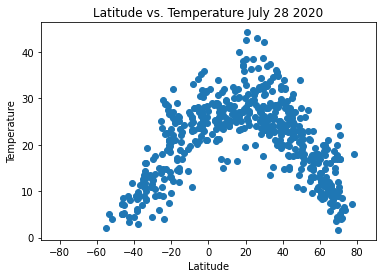

In [143]:
plt.scatter(lat, temp)
plt.title("Latitude vs. Temperature July 28 2020")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.ylabel("Temperature")
plt.savefig(fname='Latitude vs Temperature July 28 2020')
print("There appears to be a correlation between the tilt of out planet (23°) compared to the sun, and the latitude at which there are the higher temperatures.")
print("I would conclude that this has to do with the fact that the measurementes were taken in summer")

## Latitude vs. Humidity Plot

I do not see a correlation within the given parameters


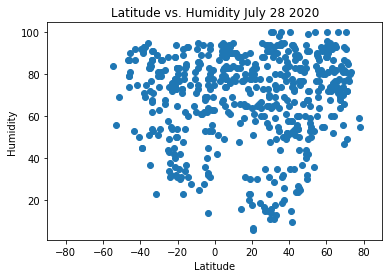

In [144]:
plt.scatter(lat,hum)
plt.title("Latitude vs. Humidity July 28 2020")
plt.xlim(-90,90)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig(fname='Latitude vs Humidity July 28 2020')
print("I do not see a correlation within the given parameters")

## Latitude vs. Cloudiness Plot

I don't see any correlation in this chart


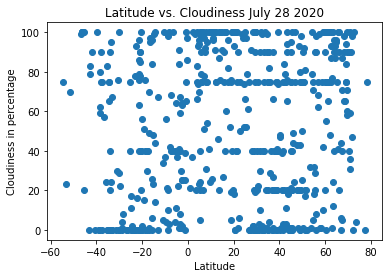

In [145]:
plt.scatter(lat,cld)
plt.title("Latitude vs. Cloudiness July 28 2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness in percentage")
plt.savefig(fname='Latitude vs Cloudiness July 28 2020')
print("I don't see any correlation in this chart")

## Latitude vs. Wind Speed Plot

I see no correlation


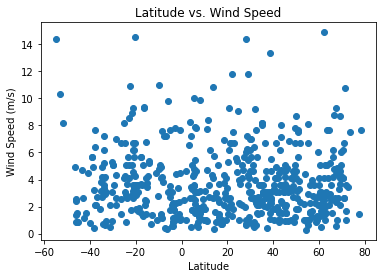

In [146]:
plt.scatter(lat,wnd)
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.savefig(fname='Latitude vs Wind Speed July 28 2020')
print("I see no correlation")

## Linear Regression

In [123]:
# OPTIONAL: Create a function to create Linear Regression plots

#NOTE: ISSUES WITH LINEAR REGRESSION, I CAN ONLY RUN IT ONCE

#scat_slope, scat_int, scat_r, scat_p, scat_std_err = st.linregress(x, y)
#regr = scat_slope * x + scat_int

#ISSUE SOLVED: it was solved if I included it in each cell.

In [124]:
# Create Northern and Southern Hemisphere DataFrames
N = Raw_df[Raw_df.Latitude >= 0]
S = Raw_df[Raw_df.Longitude <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

there seems to be a tendency that with lower latitude, higher the temperature


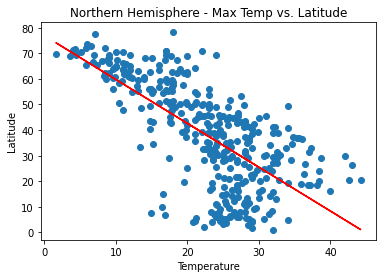

In [148]:
x=N.Temperature
y=N.Latitude

scat_slope, scat_int, scat_r, scat_p, scat_std_err = st.linregress(x, y)
regr = scat_slope * x + scat_int

plt.scatter(x,y)
plt.plot(x,regr,color='r')
plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.savefig(fname='Northern Hemisphere - Max Temp vs Latitude')
print("there seems to be a tendency that with lower latitude, higher the temperature")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The closer the latitude gets to cero the higher the temperature


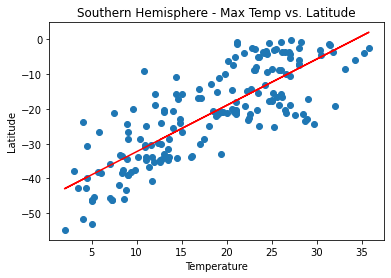

In [149]:
x=S.Temperature
y=S.Latitude

scat_slope, scat_int, scat_r, scat_p, scat_std_err = st.linregress(x, y)
regr = scat_slope * x + scat_int

plt.scatter(x,y)
plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.plot(x,regr,color='r')
plt.savefig(fname='Southern Hemisphere - Max Temp vs Latitude')
print("The closer the latitude gets to cero the higher the temperature")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There seems to be no correlation


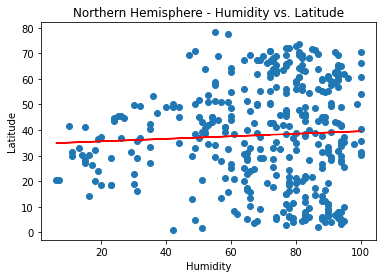

In [151]:
x=N.Humidity
y=N.Latitude

scat_slope, scat_int, scat_r, scat_p, scat_std_err = st.linregress(x, y)
regr = scat_slope * x + scat_int

plt.scatter(x,y)
plt.plot(x,regr,color='r')
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.savefig(fname='Northern Hemisphere - Humidity vs Latitude')
print("There seems to be no correlation")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

There appears to be no correlation


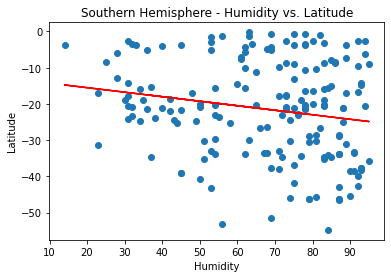

In [152]:
x=S.Humidity
y=S.Latitude

scat_slope, scat_int, scat_r, scat_p, scat_std_err = st.linregress(x, y)
regr = scat_slope * x + scat_int

plt.scatter(x,y)
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.plot(x,regr,color='r')
plt.savefig(fname='Southern Hemisphere - Humidity vs Latitude')
print("There appears to be no correlation")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There seems to be no correlation


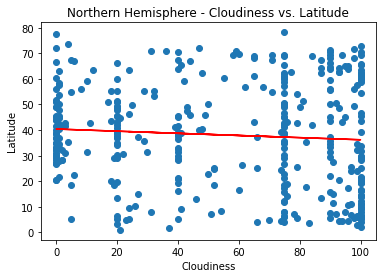

In [154]:
x=N.Cloudiness
y=N.Latitude

scat_slope, scat_int, scat_r, scat_p, scat_std_err = st.linregress(x, y)
regr = scat_slope * x + scat_int

plt.scatter(x,y)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.plot(x,regr,color='r')
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.savefig(fname='Northern Hemisphere - Cloudiness vs Latitude')
print("There seems to be no correlation")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

There seems to be no correlation


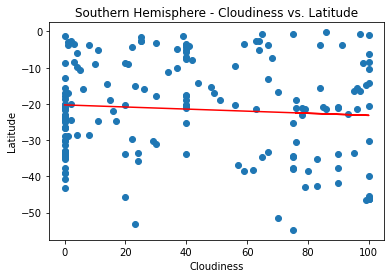

In [155]:
x=S.Cloudiness
y=S.Latitude

scat_slope, scat_int, scat_r, scat_p, scat_std_err = st.linregress(x, y)
regr = scat_slope * x + scat_int

plt.scatter(x,y)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.plot(x,regr,color='r')
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.savefig(fname='Southern Hemisphere - Cloudiness vs Latitude')
print("There seems to be no correlation")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There seems to be no correlation


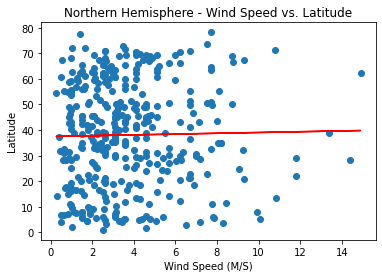

In [156]:
x=N.Wind
y=N.Latitude

scat_slope, scat_int, scat_r, scat_p, scat_std_err = st.linregress(x, y)
regr = scat_slope * x + scat_int

plt.scatter(x,y)
plt.xlabel("Wind Speed (M/S)")
plt.ylabel("Latitude")
plt.plot(x,regr,color='r')
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.savefig(fname='Northern Hemisphere - Wind Speed vs Latitude')
print("There seems to be no correlation")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

There seems to be no correlation


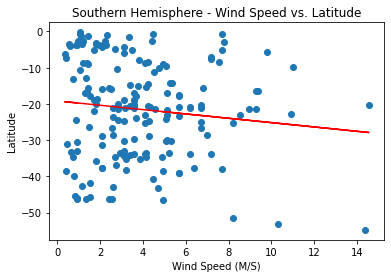

In [158]:
x=S.Wind
y=S.Latitude

scat_slope, scat_int, scat_r, scat_p, scat_std_err = st.linregress(x, y)
regr = scat_slope * x + scat_int

plt.scatter(x,y)
plt.xlabel("Wind Speed (M/S)")
plt.ylabel("Latitude")
plt.plot(x,regr,color='r')
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.savefig(fname='Southern Hemisphere - Wind Speed vs Latitude')
print("There seems to be no correlation")